In [1]:
import json
import numpy as np
from domain_objects import GameParams, NewAgent
from new_guessing_game import RandomFunctions, run_simulation, new_random_f, select_speaker, select_hearer, avg_series

In [24]:
params = {"population_size":6, "stimulus": "quotient", "max_num": 100, "discriminative_threshold": 0.95, "discriminative_history_length": 50, "delta_inc": 0.2, "delta_dec": 0.2, "delta_inh": 0.2, "alpha": 0.01, "super_alpha": 0.001, "beta": 0.2, "steps": 4000, "runs": 1, "guessing_game_2": False, "seed": 0}
params = GameParams(**params)

r = next(new_random_f(seed=params.seed))
agg_cs1 = []
agg_ds = []

population, states_sequences, states_edges_cnts, states_cnts = run_simulation(params, r.shuffle_list_random_function(), r.flip_a_coin_random_function(), r.pick_element_random_function())

windowed_communicative_success1 = np.array([avg_series(a.get_communicative_success1()) for a in population])*100
windowed_communicative_success2 = [avg_series(a.get_communicative_success2()) for a in population]
windowed_discriminative_success = np.array([avg_series(a.get_discriminative_success()) for a in population])*100


100%|██████████| 4000/4000 [00:09<00:00, 437.33it/s]


In [25]:
averaged_windowed_communicative_success1 = np.mean(windowed_communicative_success1, axis=0)
averaged_windowed_discriminative_success = np.mean(windowed_discriminative_success, axis=0)

# Visualizations

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
agent = population[0]
agent_dict = NewAgent.to_dict(population[0])
json.dumps(NewAgent.to_dict(population[0]))

'{"agent_id": 5, "categories": [{"category_id": 0, "is_active": false, "reactive_units": [[33, 89], [40, 77], [87, 91], [81, 83], [19, 43], [47, 81], [82, 99], [43, 100], [80, 93], [28, 33], [26, 53], [51, 76], [41, 43], [71, 74]], "weights": [22.454739803363985, 34.874751720893364, 54.87372721422908, 29.502579997707475, 35.10263399520647, 51.525963606214354, 60.41465261918052, 13.820277352653296, 48.659787602290265, 38.0425956608842, 9.452783101607952, 18.21017922842462, 15.92363117312144, 12.236534691181722]}, {"category_id": 1, "is_active": false, "reactive_units": [[26, 69], [58, 81], [11, 50], [14, 65], [13, 90], [11, 42], [9, 74], [24, 95], [19, 94], [11, 80], [13, 53], [24, 97], [10, 91], [1, 8], [1, 6], [7, 69], [5, 34], [5, 67], [7, 79], [4, 39], [18, 91]], "weights": [5.152376184633747, 3.254016279374321, 197.6514346036461, 201.21684499885663, 208.4393216968147, 105.44963737288357, 168.7578669916439, 127.79197588556391, 149.39383849957423, 119.80721634053718, 110.979800494904

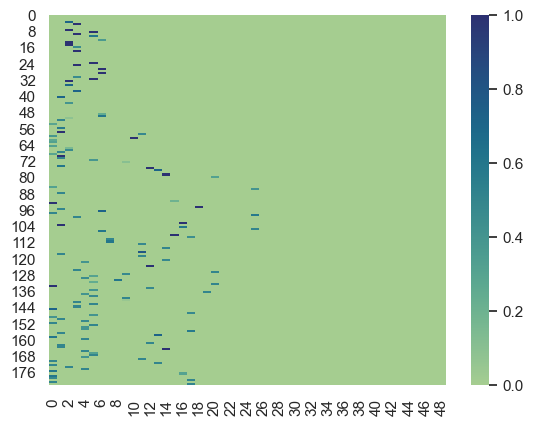

In [28]:
lxc = np.array(agent_dict['lxc'])
sns.set()
ax = sns.heatmap(lxc, vmin=0, vmax=1, cmap="crest")
plt.show()

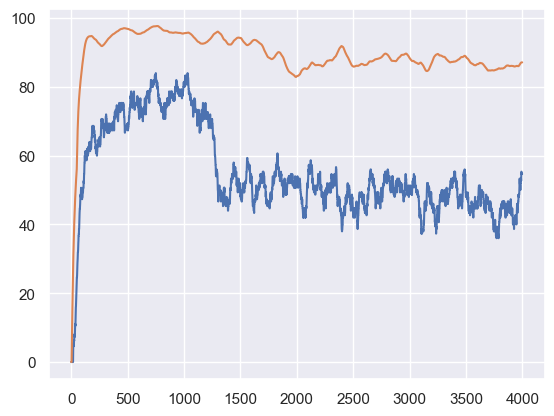

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(len(averaged_windowed_communicative_success1)), averaged_windowed_communicative_success1)
plt.plot(range(len(averaged_windowed_discriminative_success)), averaged_windowed_discriminative_success)

plt.show()


In [30]:
states_edges_cnts_normalized = []
for bucket, v in states_edges_cnts.items():
    total_cnt_in_bucket = sum([cnt for _, cnt in v.items()])
    normalized_cnts = {edge: round(cnt/total_cnt_in_bucket, 3) for edge, cnt in v.items()}
    states_edges_cnts_normalized.append((bucket, normalized_cnts))


In [31]:
len(states_edges_cnts_normalized)

40

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact
import pygraphviz as pgv
from game_graph import game_graph, GameGraph

edge_labels_cnts = states_edges_cnts_normalized
G: GameGraph = game_graph(None)
nxG = GameGraph.map_to_nxGraph(G)
edges = list(nxG.edges)
nodes = list(nxG.nodes)
pos = nx.nx_agraph.pygraphviz_layout(nxG)

def plot_graph(num=0):
    plt.figure(figsize=(8, 6))
    frame, edge_labels = edge_labels_cnts[num]
    # for e in edges:
    #     print(frame[e])
    # edge_labels = {e: edge_labels_cnts[num][e] for e in edges}
    nx.draw(nxG, pos, ax=ax, with_labels=True, node_color='skyblue', labels={n: n for n in nodes})

    # Słownik wag dla krawędzi
    # edge_labels = {(edges[i][0], edges[i][1]): edge_weights[i] for i in range(len(edges))}

    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_labels)
    plt.title(str(frame))
    
interact(plot_graph, frame=(0, len(edge_labels_cnts) - 1))

interactive(children=(IntSlider(value=0, description='num', max=1), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_graph(num=0)>